*This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur.
The content is availabe [on GitHub](https://github.com/asabenhur/CS345).*

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

<img style="padding: 10px; float:right;" alt="CC-BY-SA icon.svg in public domain" src="https://upload.wikimedia.org/wikipedia/commons/d/d0/CC-BY-SA_icon.svg" width="125">


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%autosave 0
%matplotlib inline

Autosave disabled


# Neural Networks

Neural networks are models inspired by the workings of the human brain and the ability of brains to learn and adapt.  Neural networks build on the foundations of humble linear models like the perceptron and logistic regression.

### The XOR problem

Linear models do not always give acceptable levels of accuracy.  As a toy example consider the XOR problem, which is a canonical example of a problem that is not linearly separable:

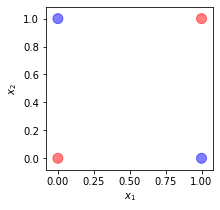

In [2]:
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = np.array([1, 0, 0, 1])

plt.figure(figsize=(3,3))
plt.scatter(X[:,0], X[:,1], c=y, s=100, alpha=0.5, cmap='bwr');
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

In [4]:
def sigmoid(s):
    return 1/(1+np.exp(-s))

def sigmoid_derivative(s):
    return sigmoid(s) *(1-sigmoid(s))

def step(s) :
    return s > 0

The sigmoid function has a severe problem: "vanishing gradients."  As you can see in the plot of the derivative, as the input to the sigmoid increases in magnitude, the derivative approaches zero very rapidly.  This means that if a hidden neuron in the network recieves a large input, the derivative to the weights resulting from that input will be very small.  This isn't typically a significant issue for small networks, but for modern networks that have many layers, it can become difficult to train the network effectively.  

With the advent of "deep learning," the activation function that is used more commonly is the Rectified Linear Unit or ReLU.  ReLU is defined as

$$ \text{ReLU}(x) = \begin{cases} x, & x \geq 0 \\ 0, & x < 0 \end{cases} $$

Its derivative is

$$ \text{ReLU}'(x) = \begin{cases} 1, & x > 0 \\ 0, & x < 0 \end{cases} $$

with the derivative at zero being somewhat arbitrary (typically a value of 0, 0.5, or 1 is chosen) due to the piecewise nature of the function.

In addition to not suffering from the vanishing gradient problem, the ReLU function is faster to evaluate.

In [6]:
def ReLU(x):
    return np.maximum(0, x)

def ReLU_derivative(x):
    dy = np.ones(x.shape)
    dy[x<0] = 0
    return dy

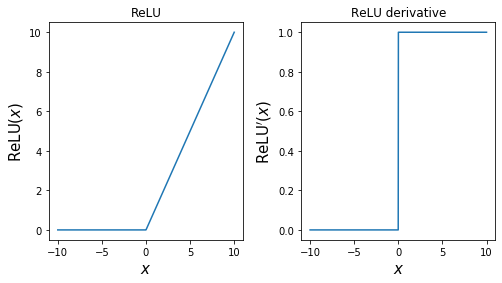

In [7]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
plt.subplots_adjust(wspace=0.3)

x = np.linspace(-10, 10, 1000)
y = ReLU(x)

dy = ReLU_derivative(x)

ax1.plot(x, y)
ax1.set_xlabel('$x$', fontsize=15)
ax1.set_ylabel('ReLU$(x)$', fontsize=15)
ax1.set_title('ReLU')
ax2.plot(x, dy)
ax2.set_xlabel('$x$', fontsize=15)
ax2.set_ylabel("ReLU$'(x)$", fontsize=15)
ax2.set_title("ReLU derivative");

### The forward function

In feed forward neural networks the computation of the network output is often referred to as a *forward pass*.
For our simple network with a single hidden layer which has two neurons the output of the network can be written as:

$$ 
f(\textbf{x}) = v_1 \sigma \underbrace{\left(\textbf{w}_1^T \textbf{x} + b_1\right)}_{h_1(\mathbf{x})} + v_2 \sigma\underbrace{\left(\textbf{w}_2^T \textbf{x} + b_2\right)}_{h_2(\mathbf{x})} + c. 
$$

Let's express that in code using Numpy:

In [8]:
# first, create some random values for the parameters:
from numpy.random import default_rng
rng = default_rng(42)
w1 = rng.normal(0, 0.1, 2)
w2 = rng.normal(0, 0.1, 2)
b = rng.normal(0, 0.1, 2)
v = rng.normal(0, 0.1, 2)
c = rng.normal(0, 0.1, 1)[0]

In [9]:
# we'll apply the network to the second element in the dataset:
x = X[1]
h1 = ReLU(np.dot(w1, x) + b[0])
h2 = ReLU(np.dot(w2, x) + b[1])

output = v[0] * h1 + v[1] * h2 + c
output

-0.0016801157504288797

We can write that in a single line:

In [10]:
output = (v[0] * ReLU(np.dot(w1, x) + b[0]) + 
          v[1] * ReLU(np.dot(w2, x) + b[1]) + c)
output

-0.0016801157504288797

By stacking together the weight vectors of the two hidden units we can express the output more succinctly:

In [11]:
rng = default_rng(42)
W = rng.normal(0, 0.1, (2, 2))
b = rng.normal(0, 0.1, (2,1))
v = rng.normal(0, 0.1, (2,1))
c = rng.normal(0, 0.1, 1)[0]

We can do this either using `np.dot`

In [12]:
np.dot(v.T, ReLU(np.dot(W, X.T) + b)) + c

array([[-0.00168012, -0.00168012, -0.00168012, -0.00290978]])

or using the matrix multiplication operator:

In [13]:
v.T @ ReLU(W @ X.T + b) + c

array([[-0.00168012, -0.00168012, -0.00168012, -0.00290978]])

### Exercise

Write the forward function for a neural network with two hidden layers, each of which has two neurons. In other words, compute the output of a neural network with this architecture.